In [61]:
import numpy as np
import pandas as pd
import os
# 进行卡方检验
from scipy.stats import chi2_contingency

In [5]:
# 读取 数据
os.chdir('D:\\study\\研究生\\数学建模\\建模比赛')
data = pd.read_csv('./建模培训/第一轮/研究生A题-2016B遗传位点分析/genotype.csv')

In [6]:
# 检验数据是否有缺失值
data[data.isna().values==True]

,rs3094315,rs3131972,rs3131969,rs1048488,rs12562034,rs12124819,rs4040617,rs2980300,rs4970383,rs4475691,...,rs10914386,rs6688664,rs6702129,rs7548805,rs7532525,rs7546536,rs4261154,rs4615888,rs10798854,rs7545865


In [7]:
data.head(10)

,rs3094315,rs3131972,rs3131969,rs1048488,rs12562034,rs12124819,rs4040617,rs2980300,rs4970383,rs4475691,...,rs10914386,rs6688664,rs6702129,rs7548805,rs7532525,rs7546536,rs4261154,rs4615888,rs10798854,rs7545865
0,TT,CT,CC,TC,TT,TT,TT,CC,CC,CC,...,CT,CT,TT,TT,TT,CC,TC,TC,TT,CT
1,TC,CT,CT,TC,CC,TC,TT,CC,CC,CC,...,CT,CC,TT,TT,TT,CT,TT,TC,TC,CC
2,TT,TT,CC,CC,CC,TC,CC,CC,CC,CC,...,CT,CC,TT,TT,TT,CC,TT,TC,TC,CT
3,TT,CC,CC,TC,CT,TT,TC,CT,CT,CT,...,CT,CC,TT,TT,TC,TT,TT,TT,TC,CC
4,TC,CT,CT,TT,CT,TT,TC,CC,TT,CC,...,CT,CT,TT,CC,TC,CT,TT,TC,TC,CT
5,TC,CC,CC,TC,TT,TT,TT,CC,TT,TT,...,CT,CT,TT,TT,TT,CT,TT,TC,TT,CC
6,TC,CT,CT,TC,CT,TC,TC,CC,CT,CT,...,CT,CC,TT,TT,CC,TT,TC,TT,TT,CT
7,TT,TT,CT,TC,CT,TT,TC,CT,CT,CC,...,TT,CC,TC,TT,TT,CC,TT,TT,TT,CT
8,TT,CC,CT,TC,CC,TT,TT,TT,TT,TT,...,CC,TT,TC,TT,TC,CT,TT,TC,TC,CT
9,TT,CT,CC,TC,CC,TC,TT,CT,CC,CC,...,CC,TT,TC,TC,CC,CT,TT,TC,TT,CC


In [7]:
# 1.编码

In [8]:
# 对每一位点不同碱基对的数量进行统计
def apply_count(arr):
    dict_count = {}
    for i in range(len(arr)):
        if arr[i][0] not in dict_count:
            dict_count[arr[i][0]] = 1
        else:
            dict_count[arr[i][0]] += 1
    return dict_count

In [9]:
position = [] # 用来存放所有位点不同碱基对的数量
for i in range(len(data.columns)):
    column = data.columns[i]
    # trans to numpy
    dict_count = data[[column]].values
    position.append(apply_count(dict_count))

In [10]:
position[:10]

[{'TT': 664, 'TC': 293, 'CC': 43},
 {'CT': 483, 'TT': 185, 'CC': 332},
 {'CC': 707, 'CT': 275, 'TT': 18},
 {'TC': 524, 'CC': 205, 'TT': 271},
 {'TT': 111, 'CC': 477, 'CT': 412},
 {'TT': 618, 'TC': 336, 'CC': 46},
 {'TT': 654, 'CC': 35, 'TC': 311},
 {'CC': 622, 'CT': 319, 'TT': 59},
 {'CC': 479, 'CT': 401, 'TT': 120},
 {'CC': 484, 'CT': 417, 'TT': 99}]

In [11]:
# 编码时默认将AB型的碱基对默认为1，0为主纯碱基对，2为次纯碱基对，所以先删除AB型碱基对
for i in range(len(position)):
    for key in position[i]:
        if key[0] != key[1]:
            del position[i][key]
            break

In [12]:
position[:5]

[{'TT': 664, 'CC': 43},
 {'TT': 185, 'CC': 332},
 {'CC': 707, 'TT': 18},
 {'CC': 205, 'TT': 271},
 {'TT': 111, 'CC': 477}]

In [13]:
def trans_code(data):
    trans_arr = []
#     data_set = []
    for i in range(len(data.columns)):
        column = data.columns[i]
        data_c = data[column].values.tolist()
        for j in range(len(data_c)):
            # 将每一个位点AB型的碱基对直接编码为1
            if data_c[j][0] != data_c[j][1]:
                data_c[j] = 1
            else:
                k = data_c[j]
                # 如果AA和BB型的碱基对数量相等，则默认TT为2，CC为0
                if len(set(position[i].values())) == 1:
                    if k == 'TT':
                        data_c[j] = 2
                    if k == 'CC':
                        data_c[j] = 0
                else:
                    # 将主纯碱基对编码为0，次纯碱基对编码为2
                    if position[i][k] == max(position[i].values()):
                        data_c[j] = 0
                    else:
                        data_c[j] = 2
    
        trans_arr.append(data_c)
    
    return trans_arr
              

In [46]:
# 将每一列编码
trans_encode = trans_code(data)
trans_arr = np.array(trans_encode).T
# 把编码后的数组储存成数据框的形式
df = pd.DataFrame(trans_arr,columns=data.columns)
df.head()

,rs3094315,rs3131972,rs3131969,rs1048488,rs12562034,rs12124819,rs4040617,rs2980300,rs4970383,rs4475691,...,rs10914386,rs6688664,rs6702129,rs7548805,rs7532525,rs7546536,rs4261154,rs4615888,rs10798854,rs7545865
0,0,1,0,1,2,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,1
1,1,1,1,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,0,2,0,2,0,1,2,0,0,0,...,1,0,0,0,0,0,0,1,1,1
3,0,0,0,1,1,0,1,1,1,1,...,1,0,0,0,1,2,0,0,1,0
4,1,1,1,0,1,0,1,0,2,0,...,1,1,0,2,1,1,0,1,1,1


In [15]:
# 导入疾病信息，0表示未患病，1表示患病
label = pd.read_table('./建模培训/第一轮/研究生A题-2016B遗传位点分析/phenotype.txt',header=None)

D:\programer\anaconda\envs\tf13\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [47]:
# 数据清洗，采用最小等位基因频率进行筛选
List1 = [] # list1每一项储存三个参数，第一个参数为位点的索引值，第二个参数为频率大的等位基因出现的概率
# 第三个参数为频率小的等位基因出现的概率
List2 = []

for i in range(len(position)):
    n_0 = 0
    n_1 = 0
    n_2 = 0
    temp = []
    for j in trans_arr[:,i]:
        if j == 0:
            n_0 += 1
        if j == 1:
            n_1 += 1
        if j == 2:
            n_2 += 1
    pro1 =( n_1 + n_0 * 2 ) / 2000
    pro2 = (n_1 + n_2 * 2 ) / 2000
    temp.append(i)
    temp.append(pro1)
    temp.append(pro2)

    List1.append(temp)


In [48]:
# List2用来储存基因概率小于0.05的位点索引，
for i in range(len(List1)):
    if List1[i][1] < 0.05 or List1[i][2] < 0.05:
        List2.append(i)
print(len(List2))
# 将List2中的位点给删除
for i in df.columns[List2]:
    df1 = df.drop(i,1)
    df = df1

28


In [50]:
# 将label添加至最后一列
df1['label'] = label

In [140]:
df1_arr = df1.values

In [52]:
# 2.
df1_0 = df1[df1.label==0]  # 获取未患病的样本
df1_1 = df1[df1.label==1]  # 获取患病的样本

In [53]:
# 获取每一位点中0，1，2编码的数量
def apply_count1(arr):
    dict_count = {0:0,1:0,2:0}
    for i in range(len(arr)):
        if arr[i][0] not in dict_count:
            dict_count[arr[i][0]] = 1
        else:
            dict_count[arr[i][0]] += 1
    return dict_count

In [54]:
# 健康的人的人每种碱基对的数量
health = []
for i in range(len(df1_0.columns)):
    column = df1.columns[i]
    # trans to numpy
    dict_count = df1_0[[column]].values
    health.append(apply_count1(dict_count))

# 不健康的人每种碱基对的数量
unhealth = []
for i in range(len(df1_1.columns)):
    column = df1.columns[i]
    dict_count = df1_1[[column]].values
    unhealth.append(apply_count1(dict_count))

In [57]:
# health_statics 存放列联表,每个位点都有一张列联表
health_statis = []
for i in range(len(df1.columns)):
    temp = []
    temp.append([health[i][0],health[i][1],health[i][2]])
    temp.append([unhealth[i][0],unhealth[i][1],unhealth[i][2]])
    health_statis.append(temp)

In [62]:
# 存放卡方检验的p值
p_value = []
for i in range(len(health_statis) - 1):
    kf_data = np.array(health_statis[i])
    kf = chi2_contingency(kf_data)
#     print(i,kf[1])
    p_value.append(kf[1])


In [67]:
p_value_arr = np.array(p_value)
# List3用来存放p值小于0.01的位点索引与p值,一共有73个
List3 = []
for i in range(len(p_value_arr)):
    temp = []
    if p_value_arr[i] < 0.01:
        temp.append(i)
        temp.append(p_value_arr[i])
        List3.append(temp)

In [73]:
# from geneview.gwas import manhattanplot
from geneview.gwas import qqplot
import matplotlib.pyplot as plt

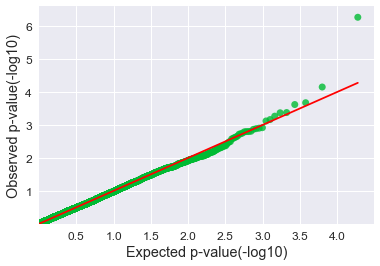

<Figure size 432x288 with 0 Axes>

In [251]:
# ax = manhattanplot(p_value_arr)
ax = qqplot(p_value_arr,color='#00bb33',xlabel='Expected p-value(-log10)',ylabel='Observed p-value(-log10)')
plt.show()
plt.savefig('qq.jpg')

Text(0.5, 0, 'Gene')

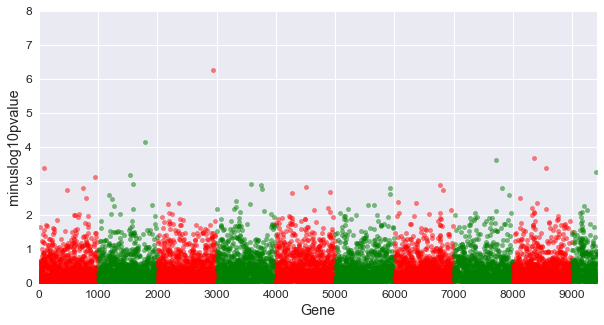

In [77]:
## 曼哈顿图
df = pd.read_csv('./建模培训/第一轮/all.csv', usecols=['gene', 'chromosome', 'pvalue'])
df['minuslog10pvalue'] = -np.log10(df.pvalue)
df = df.sort_values('chromosome')
df['ind'] = range(len(df))
df_grouped = df.groupby(('chromosome'))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
# colors = ['red','green','blue', 'yellow']
colors = (['red'] * 1000 + ['green'] * 1000) * 5
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num],alpha=0.5,ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(range(0,df.shape[0],1000))
# ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 8])
ax.set_xlabel('Gene')

In [78]:
# 3.基因与疾病的关系

In [79]:
# 遍历读取当前文件夹下的所有文件
def file_name(file_dir):
    for root,dirs,files in os.walk(file_dir):
        gene = []
        for file in files:
#             print(file)
            with open(file_dir+file) as f:
                # 取出对应的基因
#                 print(file_dir+file)
                num = (file.split('.')[0]).split('_')[1]
#                 print(num)
                lines = f.readlines()
                SNP = []
                # 存放索引值与位点
                SNP.append(num)
                for line in lines:
                    line = line.strip()
                    SNP.append(line)
                gene.append(SNP)
    return gene

In [80]:
gene = file_name('./建模培训/第一轮/研究生A题-2016B遗传位点分析/gene_info/')

In [81]:
gene[0]

['1',
 'rs3094315',
 'rs3131972',
 'rs3131969',
 'rs1048488',
 'rs12562034',
 'rs12124819',
 'rs4040617']

In [82]:
# df_gene存放着300张表，每张表对应一个基因
df_gene = []
for i in range(len(gene)):
    temp_gene = []
    for j in gene[i][1:]:
        if j in df1.columns:
            temp_gene.append(df1[j])
#             temp_gene.append(df1['label'])
            df2 = pd.concat(temp_gene,axis=1)
    df2 = pd.concat([df2,df1['label']],axis=1)
    df_gene.append(df2)

In [85]:
print(len(df_gene))
df_gene[1].head()

300


,rs3795283,rs6661597,rs6656398,rs13303016,rs4481796,rs28603108,rs3121819,rs3128318,rs3128322,rs3128323,...,rs3107145,rs3107147,rs3107151,rs3128291,rs3107156,rs3107157,rs3128296,rs425277,rs3753242,label
0,2,2,2,2,1,1,1,0,2,1,...,2,2,0,2,1,2,2,2,1,0
1,0,0,0,2,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,1,1,1,0,0,1,...,1,1,0,1,0,1,1,1,0,0
3,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,1,1,0,0,0,...,0,2,0,1,0,0,0,0,1,0


In [87]:
# 统计的模块
import statsmodels.api as sm

In [88]:
# 采用逻辑回归
def logit(df_gene):
#     df_gene['intercept'] = 1.0
    train_cols = df_gene.columns[:-1]
    logit = sm.Logit(df_gene['label'],df_gene[train_cols])
    result = logit.fit()
    # p值为方程的显著性
    p = result.llr_pvalue
    
    return p
    

In [89]:
# 300个模型的p值
p_list = []
for i in range(len(df_gene)):
    temp = []
    p = logit(df_gene[i])
    temp.append(i)
    temp.append(p)
    p_list.append(temp)

Optimization terminated successfully.
         Current function value: 0.691122
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.664984
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677158
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685732
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680645
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.666417
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667723
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669931
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674537
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676597
  

In [101]:
# 从小到大排序并返回其索引值,取出前5
np.argsort(np.array(p_list)[:,1])[:5]

array([  4, 162, 151, 164,  25], dtype=int64)

In [409]:
p_list1 = []
for i in range(len(p_list)):
    temp = []
    temp.append(int(gene[i][0]))
    temp.append(p_list[i][1])
    p_list1.append(temp)

In [412]:
p_list1[:10]

[[1, 0.6699465432281924],
 [10, 0.25021018271979895],
 [100, 0.7032744073158677],
 [101, 0.6736320718949804],
 [102, 0.002965266731303611],
 [103, 0.07552168205979806],
 [104, 0.1643838742731264],
 [105, 0.3327654154291777],
 [106, 0.28088952222359104],
 [107, 0.5115095544120907]]

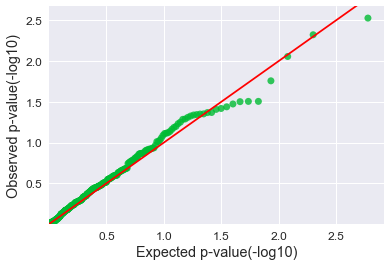

In [433]:
ax = qqplot(p1_arr[:,1],color='#00bb33',xlabel='Expected p-value(-log10)',ylabel='Observed p-value(-log10)')
plt.show()

Text(0.5, 0, 'Gene')

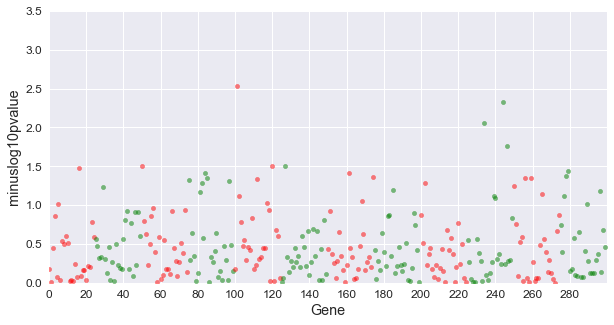

In [541]:
## 曼哈顿图
df = pd.read_csv('hh.csv', usecols=['gene', 'chromosome', 'pvalue'])
df['minuslog10pvalue'] = -np.log10(df.pvalue)
df = df.sort_values('chromosome')
df['ind'] = range(len(df))
df_grouped = df.groupby(('chromosome'))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
# colors = ['red','green','blue', 'yellow']
colors = (['red'] * 25 + ['green'] * 25) * 6
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='minuslog10pvalue',color=colors[num],alpha=0.5,ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(range(0,300,20))
# ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df)])
ax.set_ylim([0, 3.5])
ax.set_xlabel('Gene')

In [434]:
# 4.10个性状有关联的位点

In [104]:
with open('./建模培训/第一轮/研究生A题-2016B遗传位点分析/multi_phenos.txt') as f:
    lines = f.readlines()
    charac = []
    for line in lines:
        line = [int(x) for x in line.strip().split(' ')]
        charac.append(line)

In [105]:
charac[:10]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [106]:
pd_charac = pd.DataFrame(charac)

In [107]:
pd_charac.columns = ['charac1','charac2','charac3','charac4','charac5','charac6','charac7','charac8',
                     'charac9','charac10']

In [108]:
pd_charac.shape

(1000, 10)

In [109]:
# df_charac_list储存性状与位点相连的表
df_charac_list = []
for i in range(len(pd_charac.columns)):
    column = pd_charac.columns[i]
    df_charac = pd.concat([df1.drop(['label'],axis=1),pd_charac[column]],axis=1)
    df_charac_list.append(df_charac)

In [110]:
df_charac_list[0]

,rs3094315,rs3131972,rs3131969,rs1048488,rs12562034,rs12124819,rs4040617,rs2980300,rs4970383,rs4475691,...,rs6688664,rs6702129,rs7548805,rs7532525,rs7546536,rs4261154,rs4615888,rs10798854,rs7545865,charac1
0,0,1,0,1,2,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
1,1,1,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
2,0,2,0,2,0,1,2,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,0,0,0,1,1,0,1,1,1,1,...,0,0,0,1,2,0,0,1,0,0
4,1,1,1,0,1,0,1,0,2,0,...,1,0,2,1,1,0,1,1,1,0
5,1,0,0,1,2,0,0,0,2,2,...,1,0,0,0,1,0,1,0,0,0
6,1,1,1,1,1,1,1,0,1,1,...,0,0,0,2,2,1,0,0,1,1
7,0,2,1,1,1,0,1,1,1,0,...,0,1,0,0,0,0,0,0,1,1
8,0,0,1,1,0,0,0,2,2,2,...,2,1,0,1,1,0,1,1,1,0
9,0,1,0,1,0,1,0,1,0,0,...,2,1,1,2,1,0,1,0,0,1


In [111]:
# 制作列联表
def charac_info(df_charac):
    column = df_charac.columns[-1]
    df_charac_0 = df_charac[df_charac[column] == 0]
    df_charac_1 = df_charac[df_charac[column] == 1]
    charac_0 = []
    charac_1 = []
    for i in range(len(df_charac_0.columns)):
        column = df_charac_0.columns[i]
        dict_count = df_charac_0[[column]].values
        charac_0.append(apply_count1(dict_count))
    for j in range(len(df_charac_1.columns)):
        column = df_charac_1.columns[j]
        dict_count = df_charac_1[[column]].values
        charac_1.append(apply_count1(dict_count))
    charac_statis = []
    for x in range(len(df_charac_0.columns)):
        temp = []
        temp.append([charac_0[x][0],charac_0[x][1],charac_0[x][2]])
        temp.append([charac_1[x][0],charac_1[x][1],charac_1[x][2]])
        charac_statis.append(temp)
    return charac_statis
    

In [112]:
p_charac = []
for i in range(len(df_charac_list)):
    df_charac = df_charac_list[i]
    charac_statis = charac_info(df_charac)
    p_temp = []
    for k in range(len(charac_statis)-1):
        kf_data1 = np.array(charac_statis[k])
        kf1 = chi2_contingency(kf_data1)
        p_temp.append(kf1[1])
    print('运行到',i)
    p_charac.append(p_temp)
    

运行到 0
运行到 1
运行到 2
运行到 3
运行到 4
运行到 5
运行到 6
运行到 7
运行到 8
运行到 9


In [114]:
len(p_charac)

10

In [115]:
# 储存10个形状p值小于0.0005的位点
SNP_selet = []
for i in range(len(p_charac)):
    p_charac_arr = np.array(p_charac[i])
    index = np.where(p_charac_arr <  0.0005)[0]
    SNP_selet.append(index)


In [116]:
SNP_selet

[array([ 996, 1158, 1591, 1597, 3911], dtype=int64),
 array([ 608, 2699, 8783], dtype=int64),
 array([ 531, 9117, 9345], dtype=int64),
 array([1041, 5051, 7264], dtype=int64),
 array([8038, 8284, 8308], dtype=int64),
 array([1330, 1360, 4774, 8771], dtype=int64),
 array([1041, 3693, 4557, 8040], dtype=int64),
 array([5324, 7031], dtype=int64),
 array([1330, 6061, 8040], dtype=int64),
 array([1330, 4557, 7159], dtype=int64)]

In [117]:
for i in range(len(SNP_selet)):
    print(df1.columns[SNP_selet[i]])

Index(['rs35837871', 'rs780983', 'rs1775416', 'rs12139270', 'rs10737914'], dtype='object')
Index(['rs1553288', 'rs17376524', 'rs12137141'], dtype='object')
Index(['rs10909845', 'rs3104435', 'rs7515988'], dtype='object')
Index(['rs351617', 'rs7538876', 'rs2501430'], dtype='object')
Index(['rs12722898', 'rs2231863', 'rs7535816'], dtype='object')
Index(['rs10157835', 'rs12754637', 'rs6698317', 'rs166604'], dtype='object')
Index(['rs351617', 'rs3010876', 'rs12746773', 'rs4360511'], dtype='object')
Index(['rs4920299', 'rs4655141'], dtype='object')
Index(['rs10157835', 'rs11573253', 'rs4360511'], dtype='object')
Index(['rs10157835', 'rs12746773', 'rs3218121'], dtype='object')


In [118]:
# 除去重复的位点，一共出现多少位点
SNP_list = []
for i in range(len(SNP_selet)):
    for j in SNP_selet[i]:
        if j not in SNP_list:
            SNP_list.append(j)

In [119]:
# 一共筛选出28个位点
len(SNP_list)

28

In [529]:
df_select = pd.concat([df1[df1.columns[SNP_list]],pd_charac],axis=1)

In [531]:
df_select.head()

,rs35837871,rs780983,rs1775416,rs12139270,rs10737914,rs1553288,rs17376524,rs12137141,rs10909845,rs3104435,...,charac1,charac2,charac3,charac4,charac5,charac6,charac7,charac8,charac9,charac10
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2,2,1,1,0,0,0,0,1,1,2,...,0,0,1,0,1,1,1,1,0,0
3,0,1,1,0,1,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,0,1,1,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [532]:
df_select.to_csv('df_select.csv')